Dataset Link : https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score ,accuracy_score



In [2]:
data = pd.read_csv('C:\python\data_set\creditcard.csv')

### 1. Display Top 5 Rows of The Dataset

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### 2. Check Last 5 Rows of The Dataset

In [4]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


### 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [5]:
data.shape

(284807, 31)

In [6]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 284807
Number of Columns 31


### 4. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Get some basic summary stats


In [8]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### 5. Check Null Values In The Dataset

In [9]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
#data = data.drop(['Time'],axis=1)

In [13]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [14]:
data.shape

(284807, 31)

In [15]:
data.duplicated().sum()

1081

In [16]:
data = data.drop_duplicates()

In [17]:
data.duplicated().sum()

0

In [18]:
data.shape

(283726, 31)

### 6. Not Handling Imbalanced

In [19]:
data['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

In [20]:
import seaborn as sns

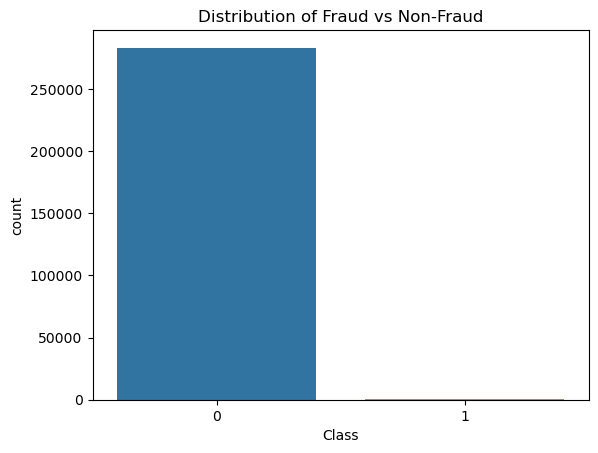

In [21]:
sns.countplot(data=data, x="Class")
plt.title("Distribution of Fraud vs Non-Fraud")
plt.show()

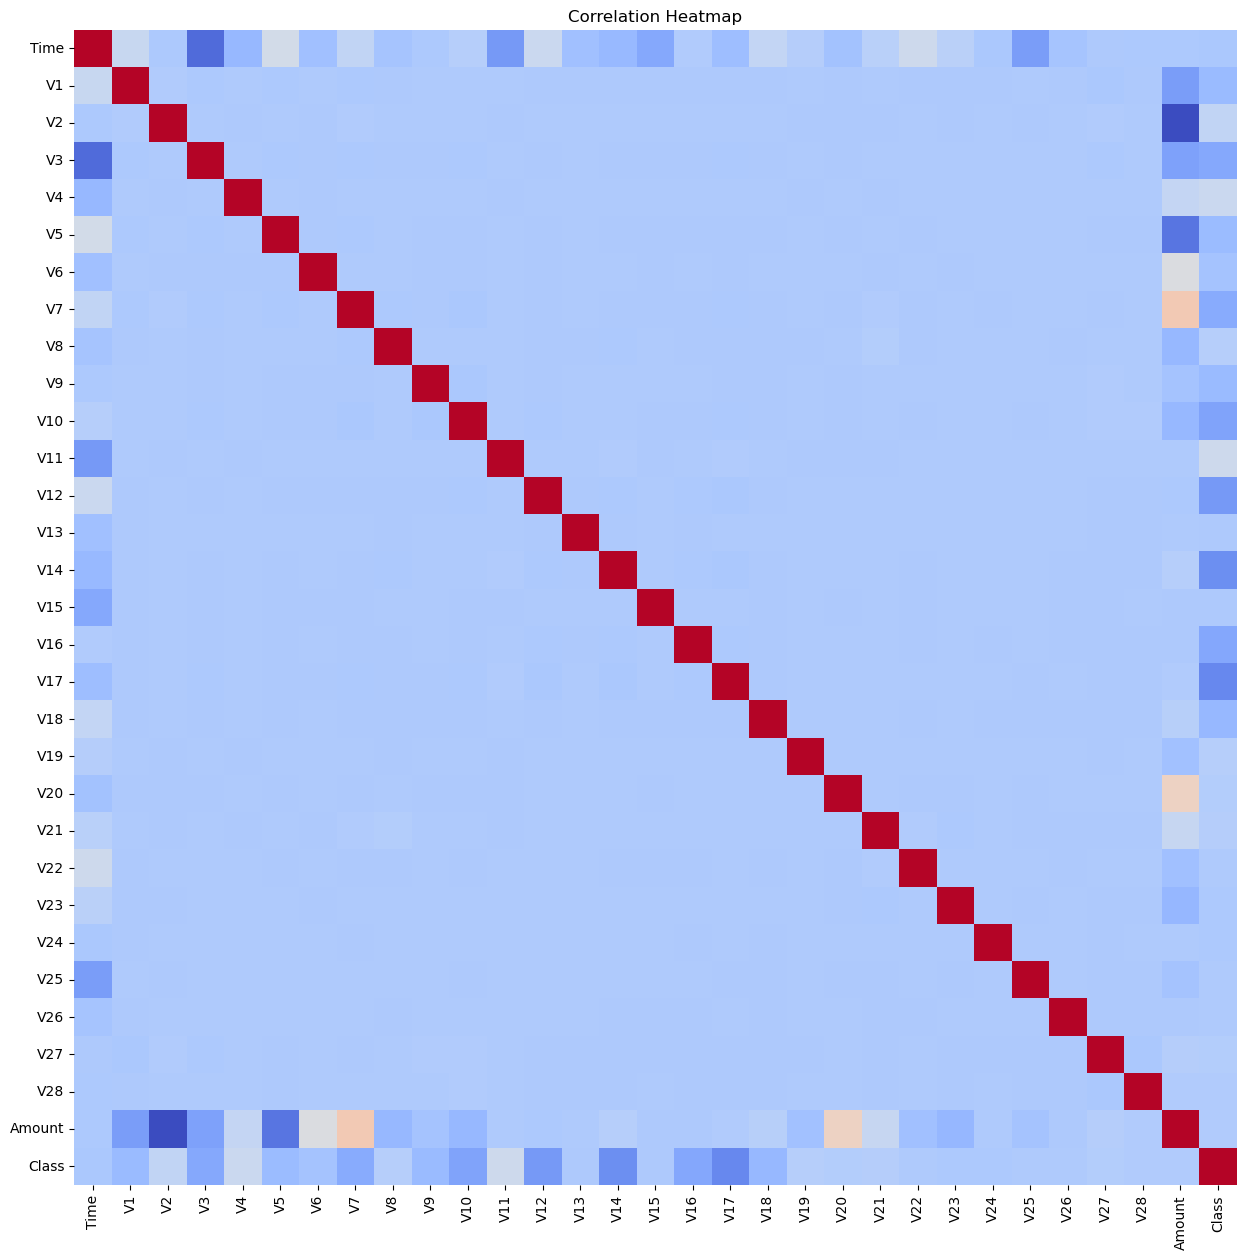

In [22]:

# Correlation heatmap
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), cmap="coolwarm", cbar=False)
plt.title("Correlation Heatmap")
plt.show()


c:\Users\omare\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


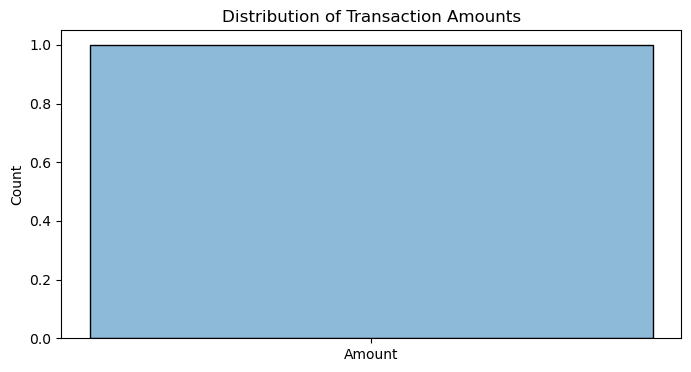

In [23]:
plt.figure(figsize=(8,4))
sns.histplot(data=["Amount"], bins=50, kde=True)
plt.title("Distribution of Transaction Amounts")
plt.show()

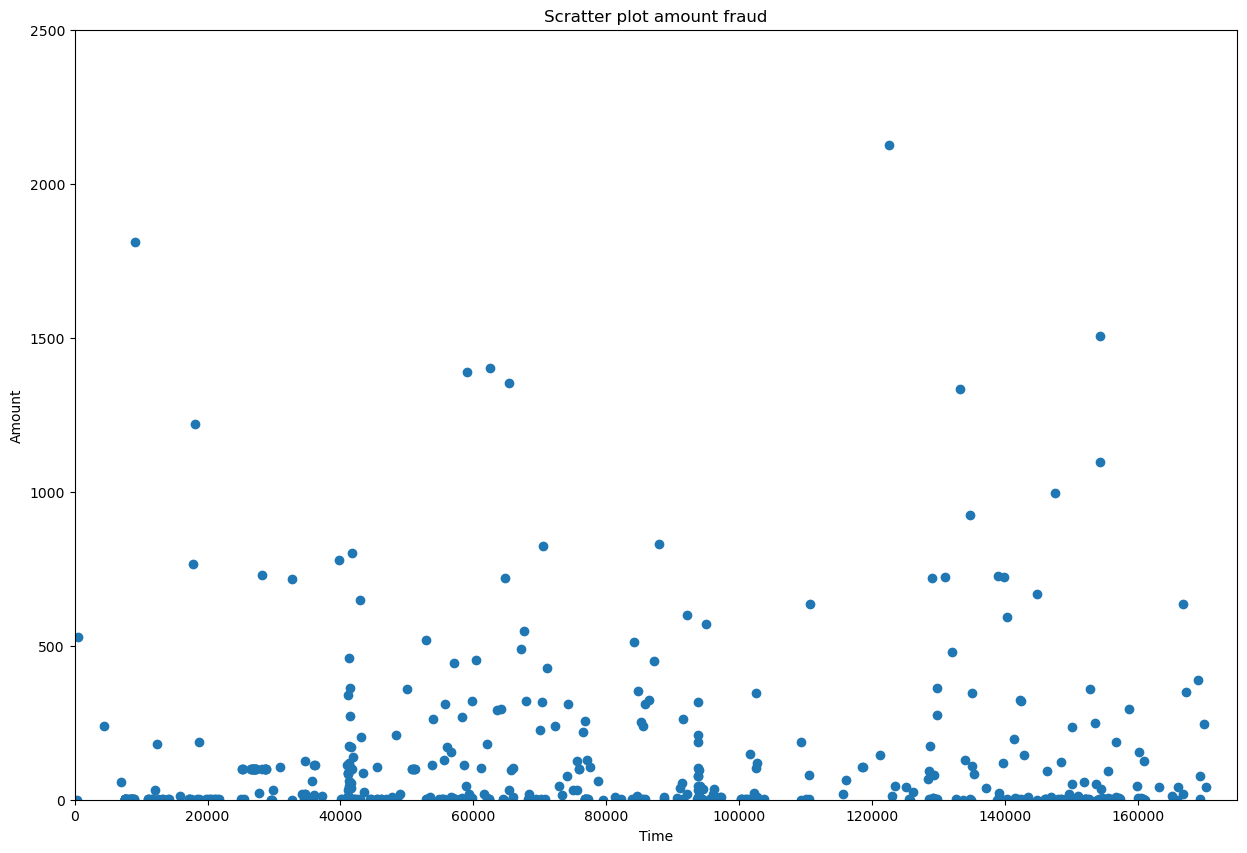

In [24]:
df_fraud = data[data['Class'] == 1] # Recovery of fraud data
plt.figure(figsize=(15,10))
plt.scatter(df_fraud['Time'], df_fraud['Amount']) # Display fraud amounts according to their time
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()


c:\Users\omare\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\omare\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\omare\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


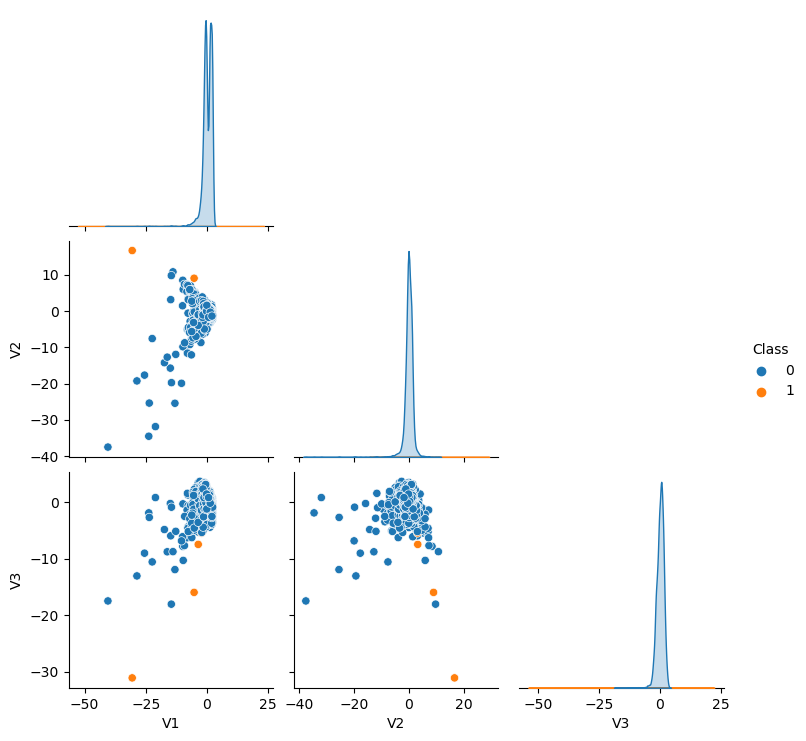

In [25]:
sample_df = data.sample(5000, random_state=42)  #
sns.pairplot(sample_df[["V1","V2","V3","Class"]], hue="Class", corner=True)
plt.show()

In [26]:
sc = StandardScaler()
data['Amount']=sc.fit_transform(pd.DataFrame(data['Amount']))

In [27]:
X = data.drop('Class',axis=1)
y = data['Class']

### 8. Splitting The Dataset Into The Training Set And Test Set

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                  random_state=42)

In [29]:
log = LogisticRegression()
log.fit(X_train,y_train)

c:\Users\omare\anaconda4\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [30]:
pred = log.predict(X_test)

In [31]:
print(f1_score(y_test,pred))

0.651685393258427


### 9. Handling Imbalanced Dataset

In [32]:
# Undersampling
# Oversampling

### Undersampling

In [33]:
normal = data[data['Class']==0]
fraud = data[data['Class']==1]

In [34]:
normal.shape

(283253, 31)

In [35]:
fraud.shape

(473, 31)

In [36]:
normal_sample=normal.sample(n=473)

In [37]:
normal_sample.shape

(473, 31)

In [38]:
new_data = pd.concat([normal_sample,fraud],ignore_index=True)

In [39]:
new_data['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [40]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,76700.0,-1.537003,2.028363,0.261397,-0.014619,0.825862,0.045663,-0.836231,-2.123427,-1.699727,...,-1.223682,0.320244,-0.653011,-0.362265,0.287211,0.404107,-0.112512,0.061352,-0.350292,0
1,122713.0,1.944501,-1.957347,-0.784266,-1.505437,-1.444195,-0.159820,-1.134107,-0.127235,-1.081992,...,-0.312540,-0.837372,0.296359,0.428878,-0.594399,-0.522430,0.002816,0.002315,0.428625,0
2,45172.0,-0.597648,0.775015,1.230514,-0.126098,0.694181,-0.559330,0.869327,-0.244854,-0.281433,...,0.099020,0.299257,-0.340820,-0.014516,0.129966,-0.559819,-0.382119,-0.196701,-0.328327,0
3,129847.0,-0.191843,0.478203,1.281594,-1.018810,0.184753,-0.080070,0.320015,0.139463,0.486617,...,-0.168184,-0.485250,0.004537,0.568826,-0.212691,-0.295068,0.023299,0.024350,-0.321418,0
4,108867.0,1.881864,-0.173782,0.120673,1.396270,-0.692701,-0.206166,-0.820758,0.136323,2.108174,...,-0.100353,-0.097487,0.358736,-0.152365,-0.530636,-0.904144,0.022895,-0.039613,-0.301410,0


In [41]:
X = new_data.drop('Class',axis=1)
y = new_data['Class']

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                  random_state=42)

### 10. Logistic Regression

In [43]:
log = LogisticRegression()
log.fit(X_train,y_train)

c:\Users\omare\anaconda4\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [44]:
y_pred1 = log.predict(X_test)

In [45]:
accuracy_score(y_test,y_pred1)

0.9473684210526315

In [46]:
cm = confusion_matrix(y_test, y_pred1)
cm

array([[86,  2],
       [ 8, 94]], dtype=int64)

In [47]:
precision_score(y_test,y_pred1)

0.9791666666666666

In [48]:
recall_score(y_test,y_pred1)

0.9215686274509803

In [49]:
f1_score(y_test,y_pred1)

0.9494949494949495

### 11. Decision Tree Classifier

In [50]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [51]:
y_pred2 = dt.predict(X_test)

In [52]:
accuracy_score(y_test,y_pred2)

0.9105263157894737

In [53]:
cm = confusion_matrix(y_test,y_pred2)
cm

array([[83,  5],
       [12, 90]], dtype=int64)

In [54]:
precision_score(y_test,y_pred2)

0.9473684210526315

In [55]:
recall_score(y_test,y_pred2)

0.8823529411764706

In [56]:
f1_score(y_test,y_pred2)

0.9137055837563451

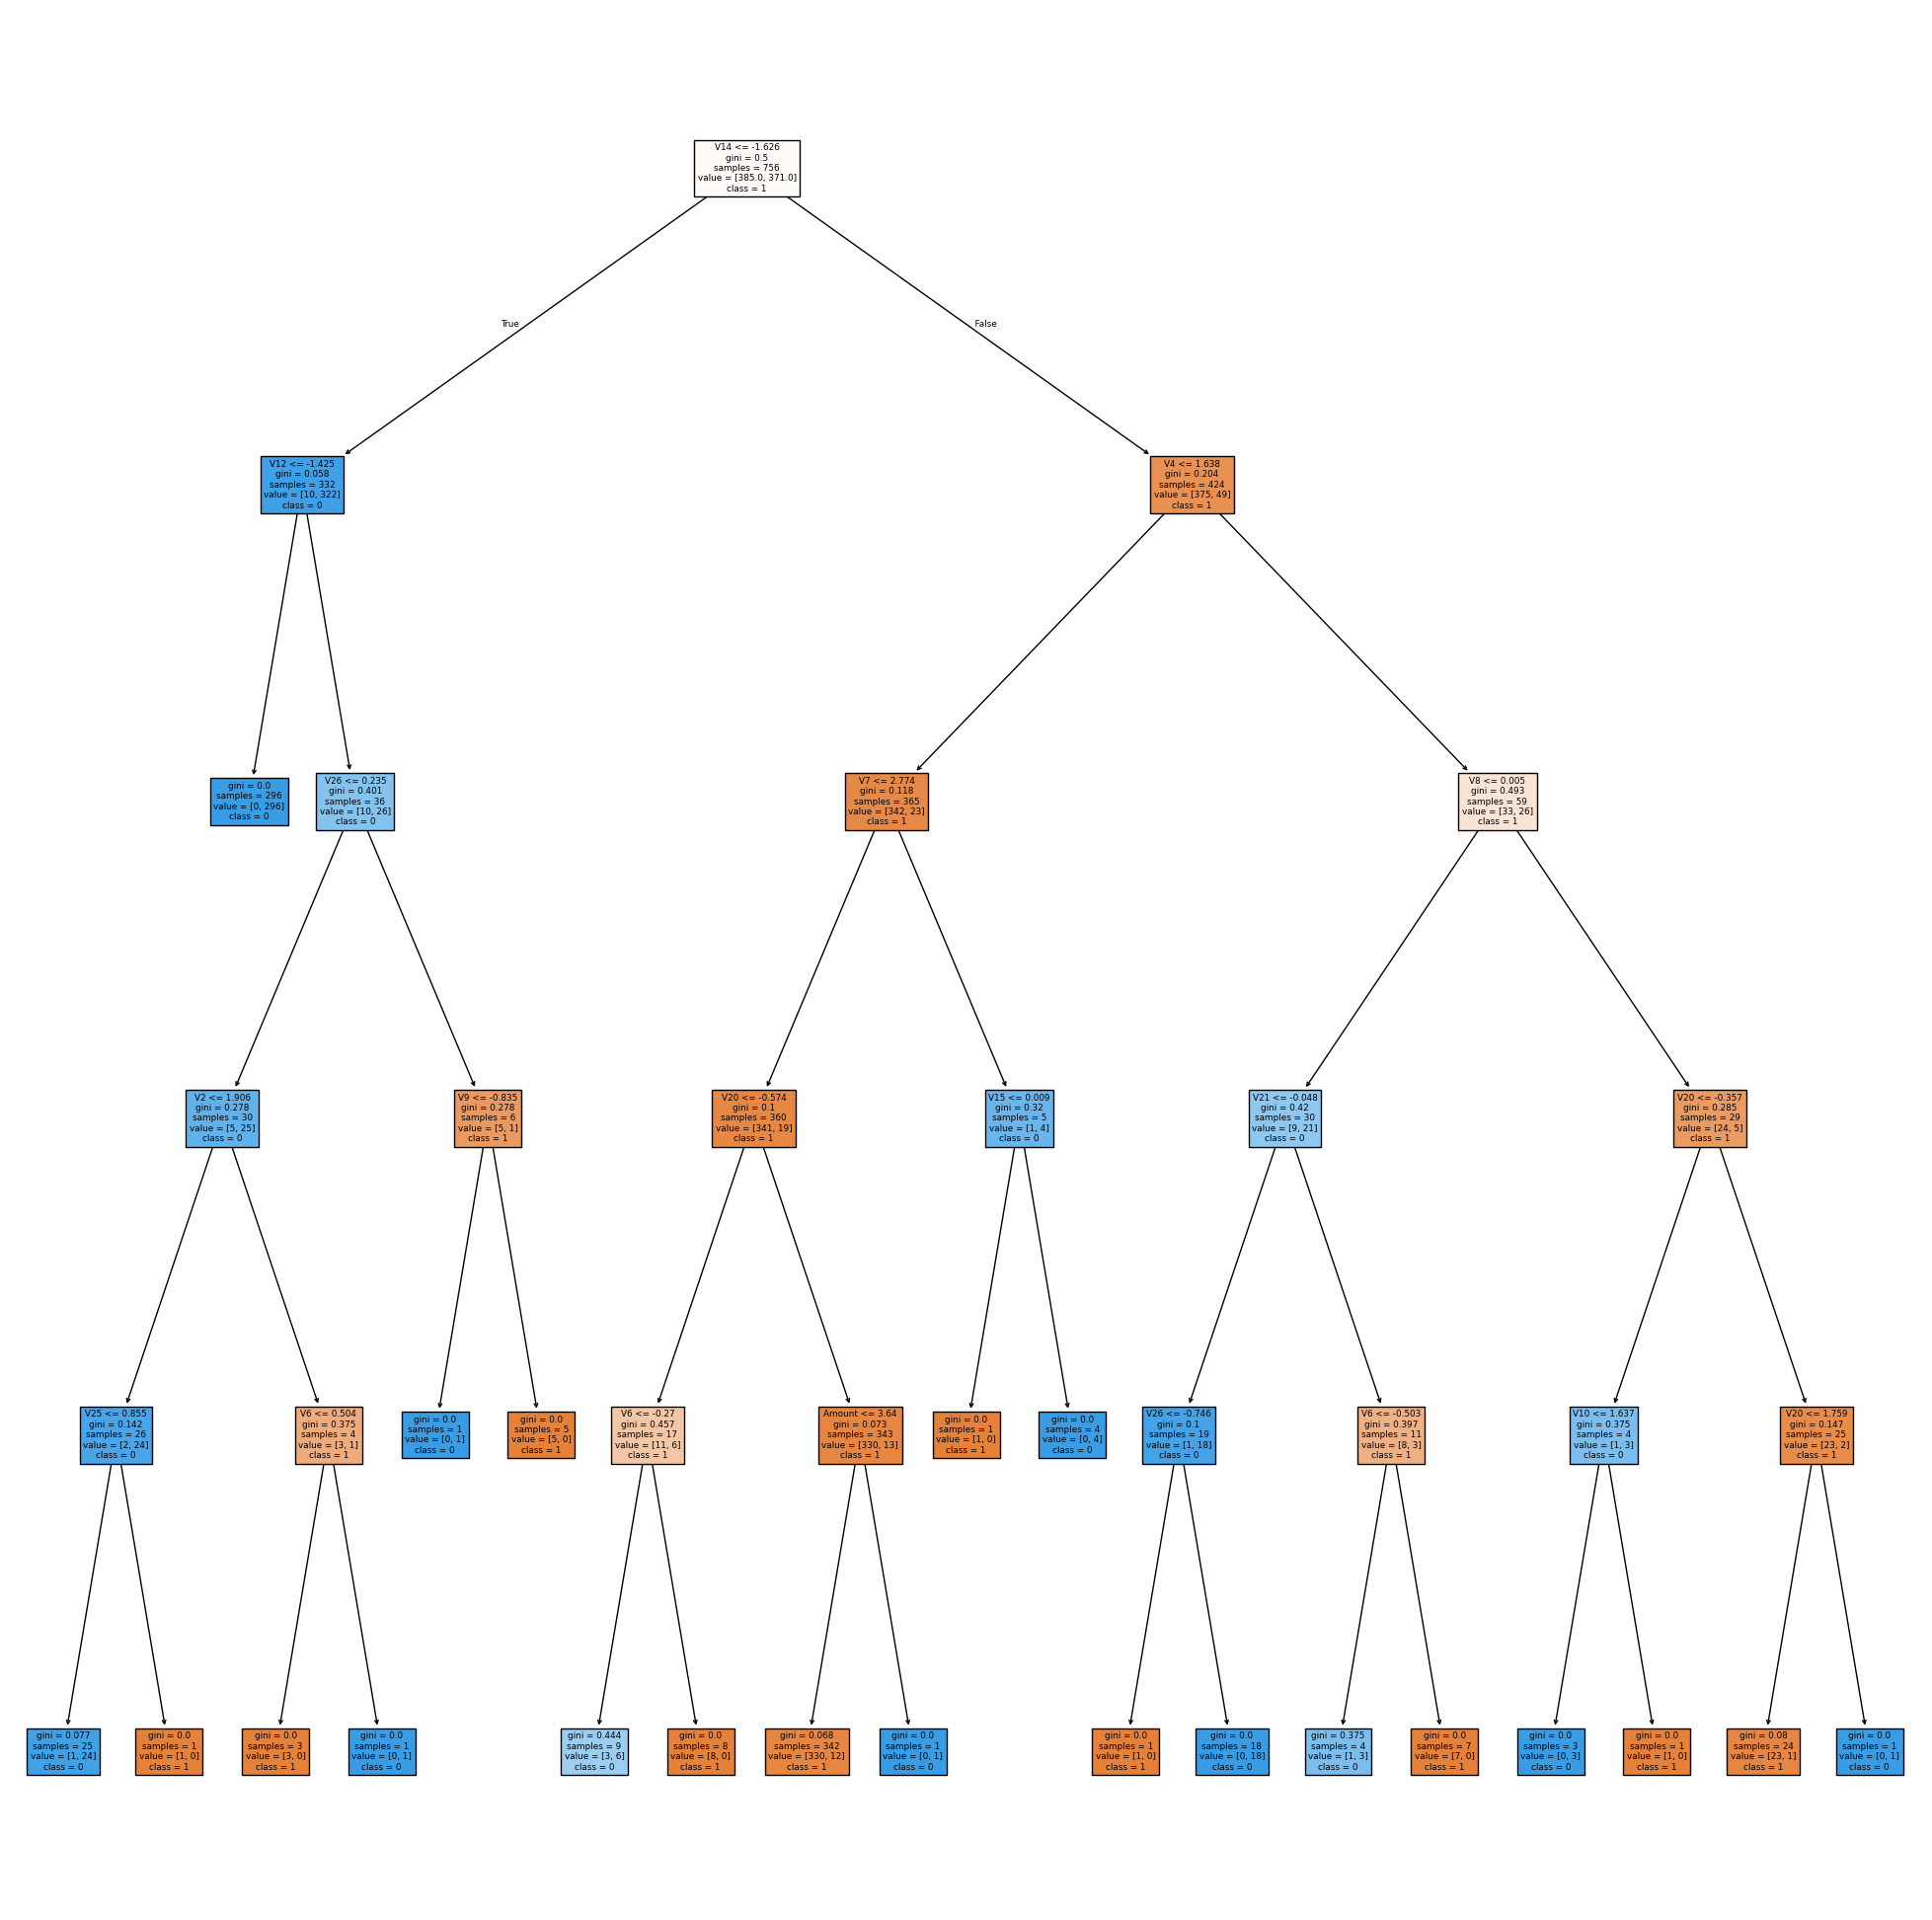

In [57]:
plt.figure(figsize=(25,25))
dec_tree = plot_tree(dt,
                        feature_names=X.columns,
                        class_names=['1','0'],
                        filled=True,)
plt.savefig("one.png")


### 12. Naive Bayes classifier

In [58]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)


,priors,None
,var_smoothing,1e-09


In [59]:
y_pred3 = nb_classifier.predict(X_test)

In [60]:
accuracy_score(y_test,y_pred3)

0.8842105263157894

In [61]:
cm = confusion_matrix(y_test,y_pred3)
cm

array([[88,  0],
       [22, 80]], dtype=int64)

In [62]:
precision_score(y_test,y_pred3)

1.0

In [63]:
recall_score(y_test,y_pred3)

0.7843137254901961

In [64]:
f1_score(y_test,y_pred3)

0.8791208791208791

In [65]:
final_data = pd.DataFrame({'Models':['LR','DT','Nb'],
              "ACC":[accuracy_score(y_test,y_pred1)*100,
                      accuracy_score(y_test,y_pred2)*100,
                      accuracy_score(y_test,y_pred3)*100
                    ]})

In [66]:
final_data

,Models,ACC
0,LR,94.736842
1,DT,91.052632
2,Nb,88.421053


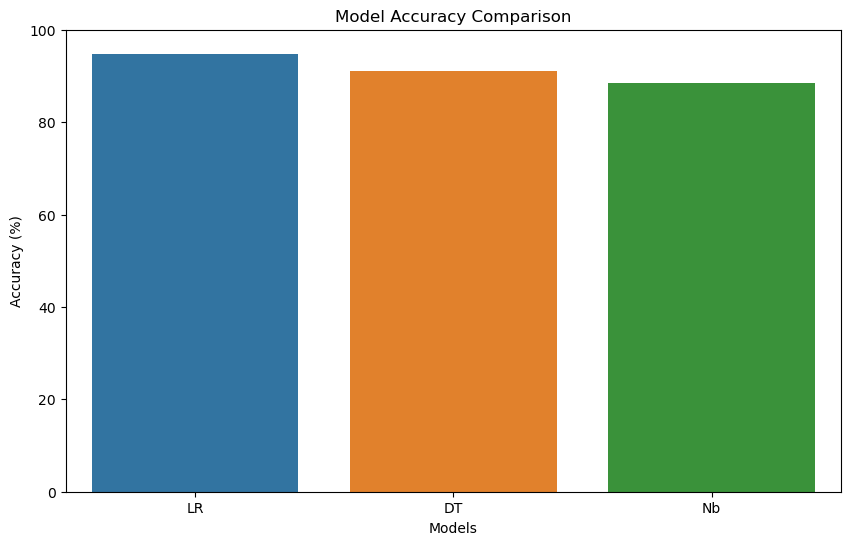

In [67]:
plt.figure(figsize=(10, 6))
sns.barplot(data=final_data, x='Models', y='ACC')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)  
plt.show()

### Oversampling

In [68]:
X = data.drop('Class',axis=1)
y = data['Class']

In [69]:
X.shape

(283726, 30)

In [70]:
y.shape

(283726,)

In [71]:
!pip install --upgrade scikit-learn imbalanced-learn



In [72]:
from imblearn.over_sampling import SMOTE

In [73]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [74]:
y_res.value_counts()

Class
0    283253
1    283253
Name: count, dtype: int64

In [75]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.20,
                                                  random_state=42)

### 10. Logistic Regression

In [76]:
log = LogisticRegression()
log.fit(X_train,y_train)

c:\Users\omare\anaconda4\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [77]:
y_pred4 = log.predict(X_test)

In [78]:
accuracy_score(y_test,y_pred4)

0.9716951157084606

In [79]:
cm = confusion_matrix(y_test,y_pred4)
cm

array([[55415,  1048],
       [ 2159, 54680]], dtype=int64)

In [80]:
precision_score(y_test,y_pred4)

0.9811943726672409

In [81]:
recall_score(y_test,y_pred4)

0.9620155175143827

In [82]:
f1_score(y_test,y_pred4)

0.9715103005321275

### 11. Decision Tree Classifier

In [83]:
dt=DecisionTreeClassifier(max_depth=5)
dt.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [84]:
y_pred5 = dt.predict(X_test)

In [85]:
accuracy_score(y_test,y_pred5)

0.9680499902914335

In [86]:
cm = confusion_matrix(y_test,y_pred5)
cm

array([[55432,  1031],
       [ 2589, 54250]], dtype=int64)

In [87]:
precision_score(y_test,y_pred5)

0.9813498308641305

In [88]:
recall_score(y_test,y_pred5)

0.9544502894139587

In [89]:
f1_score(y_test,y_pred5)

0.9677131644666429

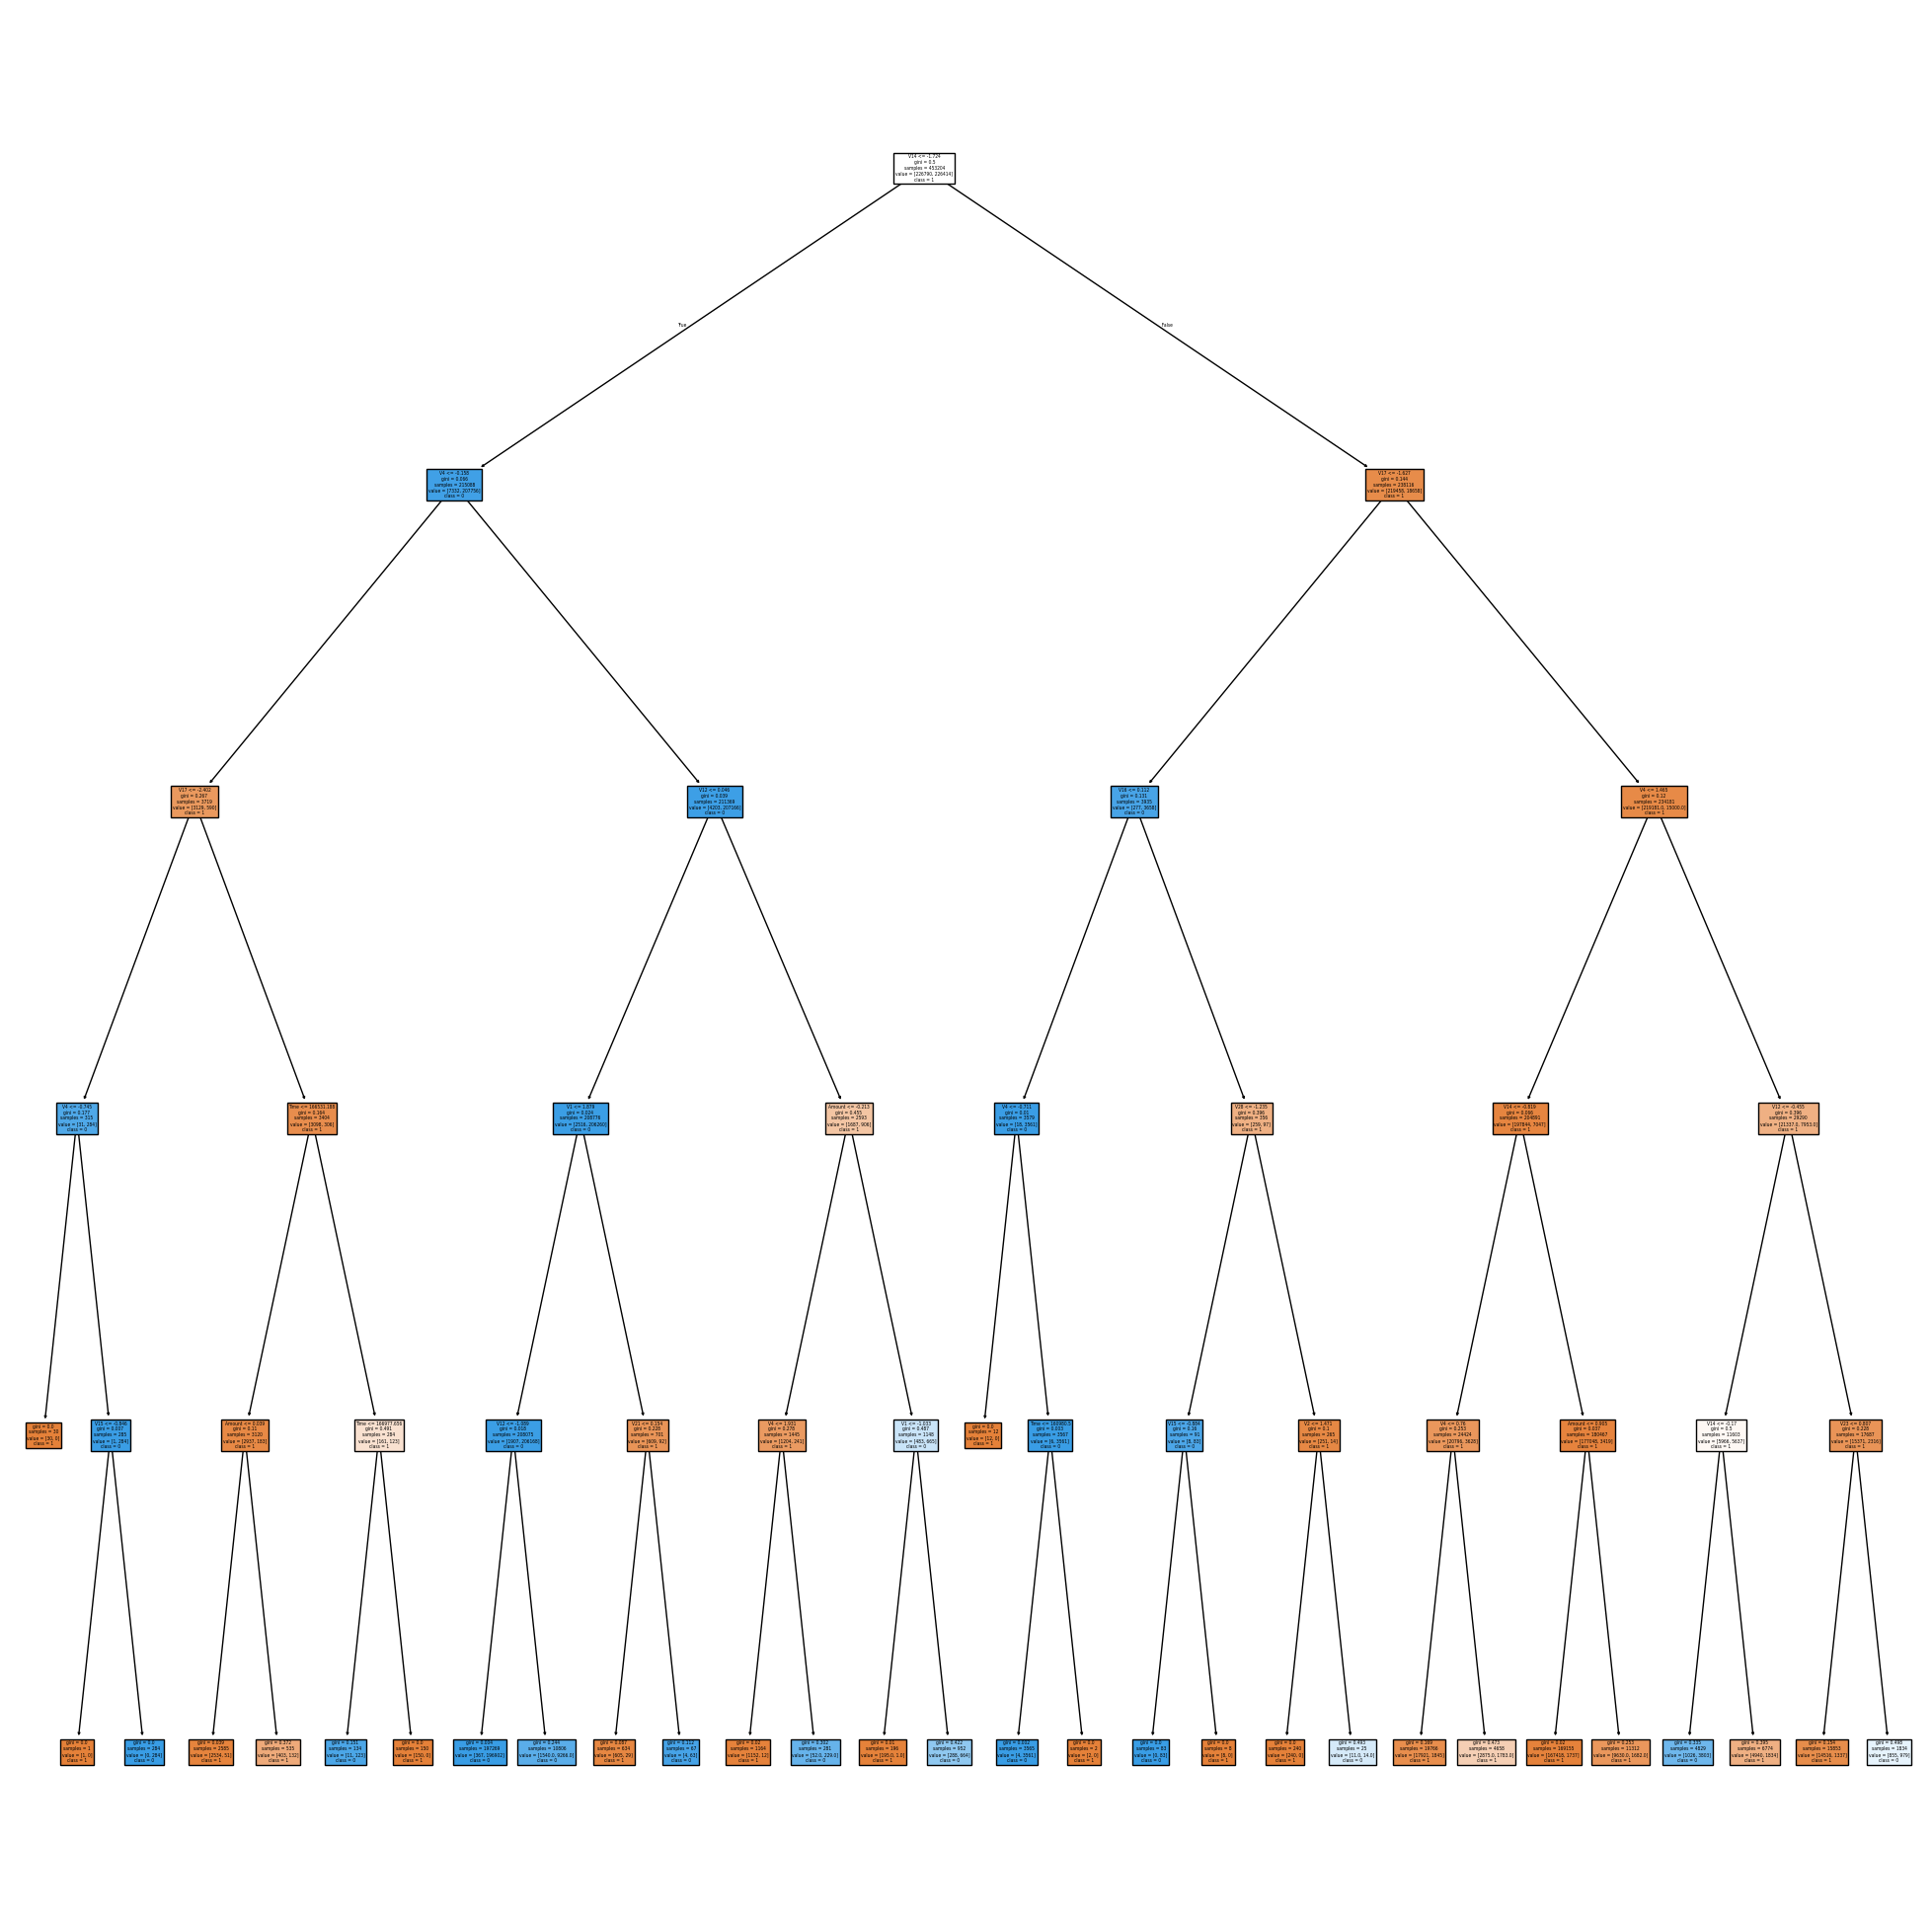

In [90]:
plt.figure(figsize=(25,25))
dec_tree = plot_tree(dt,
                        feature_names=X.columns,
                        class_names=['1','0'],
                        filled=True,)
plt.savefig("one.png")


### 12. Naive Bayes classifier

In [91]:
#rf = RandomForestClassifier()
#rf.fit(X_train,y_train)

In [92]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)


,priors,None
,var_smoothing,1e-09


In [93]:
y_pred6 = nb_classifier.predict(X_test)

In [94]:
accuracy_score(y_test,y_pred6)

0.8691373497378687

In [95]:
cm = confusion_matrix(y_test,y_pred6)
cm

array([[56018,   445],
       [14382, 42457]], dtype=int64)

In [96]:
precision_score(y_test,y_pred6)

0.989627523192392

In [97]:
recall_score(y_test,y_pred6)

0.7469695103713999

In [98]:
f1_score(y_test,y_pred6)

0.8513449835072838

In [99]:
final_data = pd.DataFrame({'Models':['LR','DT','Nb'],
              "ACC":[accuracy_score(y_test,y_pred4)*100,
                      accuracy_score(y_test,y_pred5)*100,
                      accuracy_score(y_test,y_pred6)*100
                    ]})

In [100]:
final_data

,Models,ACC
0,LR,97.169512
1,DT,96.804999
2,Nb,86.913735


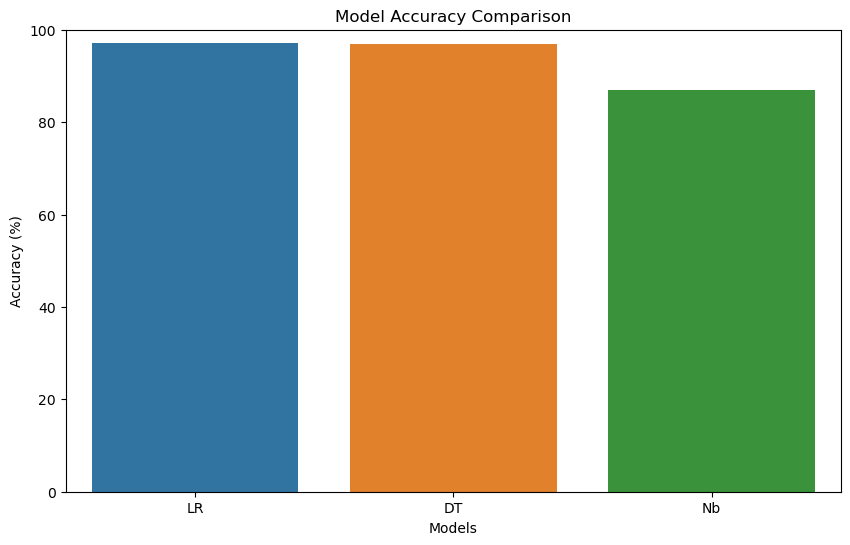

In [101]:
plt.figure(figsize=(10, 6))
sns.barplot(data=final_data, x='Models', y='ACC')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)  
plt.show()